# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pandas.io.json import json_normalize

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_data = []

for city in cities:
    city_url = url + "&q=" + city
    
    try:
        results = requests.get(city_url).json()
#         print(json.dumps(results, indent=4)
        print(results)
        
        name = results['name']
        cloudiness = results['clouds']['all']
        country = results['sys']['country']
        date = results['dt']
        humidity = results['main']['humidity']
        lat = results['coord']['lat']
        lng = results['coord']['lon']
        max_temp = results['main']['temp_max']
        wind_speed = results['wind']['speed']
        
        city_data.append({
            'City': city,
            'Cloudiness': cloudiness,
            'Country': country,
            'Date': date,
            'Humidity': humidity,
            'Lat': lat,
            'Lng': lng,
            'Max Temp': max_temp,
            'Wind Speed': wind_speed
        })
    except:
        print("City not found!")
        
#     city_data.append(results)
        
        
            
    




{'coord': {'lon': -87.99, 'lat': 31.44}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.95, 'pressure': 1010, 'humidity': 79, 'temp_min': 77, 'temp_max': 82}, 'wind': {'speed': 3, 'deg': 95, 'gust': 3.58}, 'rain': {'3h': 0.812}, 'clouds': {'all': 55}, 'dt': 1562980395, 'sys': {'type': 3, 'id': 2011568, 'message': 0.0079, 'country': 'US', 'sunrise': 1562928953, 'sunset': 1562979529}, 'timezone': -18000, 'id': 4069458, 'name': 'Wagar', 'cod': 200}
{'coord': {'lon': -56.83, 'lat': -26.98}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.01, 'pressure': 1013.58, 'humidity': 76, 'temp_min': 67.01, 'temp_max': 67.01, 'sea_level': 1013.58, 'grnd_level': 1000.52}, 'wind': {'speed': 1.86, 'deg': 115.428}, 'clouds': {'all': 90}, 'dt': 1562980395, 'sys': {'message': 0.0058, 'country': 'PY', 'sunrise': 1562927763, 'sunset': 1562965761},

{'coord': {'lon': 64.48, 'lat': 61.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.53, 'pressure': 1015.84, 'humidity': 72, 'temp_min': 60.53, 'temp_max': 60.53, 'sea_level': 1015.84, 'grnd_level': 1002.92}, 'wind': {'speed': 3.2, 'deg': 143.946}, 'clouds': {'all': 100}, 'dt': 1562980399, 'sys': {'message': 0.0063, 'country': 'RU', 'sunrise': 1562970180, 'sunset': 1563037925}, 'timezone': 18000, 'id': 1502750, 'name': 'Kommunisticheskiy', 'cod': 200}
{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 74.01, 'pressure': 1010, 'humidity': 61, 'temp_min': 70, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1562980399, 'sys': {'type': 1, 'id': 8521, 'message': 0.007, 'country': 'EC', 'sunrise': 1562933064, 'sunset': 1562976551}, 'ti

{'coord': {'lon': 124.71, 'lat': 52.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 76.01, 'pressure': 1004.91, 'humidity': 51, 'temp_min': 76.01, 'temp_max': 76.01, 'sea_level': 1004.91, 'grnd_level': 940.87}, 'wind': {'speed': 2.01, 'deg': 35.545}, 'clouds': {'all': 45}, 'dt': 1562980403, 'sys': {'message': 0.0062, 'country': 'CN', 'sunrise': 1562960039, 'sunset': 1563019153}, 'timezone': 28800, 'id': 2034615, 'name': 'Tahe', 'cod': 200}
{'coord': {'lon': -52.64, 'lat': 5.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1013, 'humidity': 88, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 2.73, 'deg': 71.817}, 'clouds': {'all': 0}, 'dt': 1562980404, 'sys': {'type': 1, 'id': 8669, 'message': 0.008, 'country': 'GF', 'sunrise': 1562923439, 'sunset': 1562968074}, 'timezone': -10800, '

{'coord': {'lon': 6.79, 'lat': 4.71}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.93, 'pressure': 1015.24, 'humidity': 91, 'temp_min': 74.93, 'temp_max': 74.93, 'sea_level': 1015.24, 'grnd_level': 1014.24}, 'wind': {'speed': 3.98, 'deg': 224.522}, 'rain': {'3h': 1.562}, 'clouds': {'all': 98}, 'dt': 1562980406, 'sys': {'message': 0.0068, 'country': 'NG', 'sunrise': 1562995629, 'sunset': 1563040170}, 'timezone': 3600, 'id': 2324433, 'name': 'Abonnema', 'cod': 200}
{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1013, 'humidity': 100, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 4000, 'wind': {'speed': 5.82, 'deg': 270}, 'clouds': {'all': 90}, 'dt': 1562980406, 'sys': {'type': 1, 'id': 9229, 'message': 0.0075, 'country': 'IN', 'sunrise': 1562978307, 'sunset': 1563024994},

{'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.39, 'pressure': 1013.72, 'humidity': 82, 'temp_min': 65.39, 'temp_max': 65.39, 'sea_level': 1013.72, 'grnd_level': 1013.01}, 'wind': {'speed': 3.62, 'deg': 332.929}, 'clouds': {'all': 98}, 'dt': 1562980409, 'sys': {'message': 0.0107, 'country': 'BR', 'sunrise': 1562926579, 'sunset': 1562963773}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
{'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 52.61, 'pressure': 1007.58, 'humidity': 68, 'temp_min': 52.61, 'temp_max': 52.61, 'sea_level': 1007.58, 'grnd_level': 1004.72}, 'wind': {'speed': 6.06, 'deg': 58.597}, 'clouds': {'all': 95}, 'dt': 1562980287, 'sys': {'message': 0.0077, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone

{'coord': {'lon': -86.92, 'lat': 14.68}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 74.57, 'pressure': 1010.53, 'humidity': 64, 'temp_min': 74.57, 'temp_max': 74.57, 'sea_level': 1010.53, 'grnd_level': 909.09}, 'wind': {'speed': 8.12, 'deg': 76.595}, 'clouds': {'all': 14}, 'dt': 1562980413, 'sys': {'message': 0.0079, 'country': 'HN', 'sunrise': 1562930705, 'sunset': 1562977264}, 'timezone': -21600, 'id': 3609418, 'name': 'San Cristobal', 'cod': 200}
{'coord': {'lon': 40.04, 'lat': 48.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1007, 'humidity': 87, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 222.341}, 'clouds': {'all': 0}, 'dt': 1562980413, 'sys': {'type': 1, 'id': 8971, 'message': 0.0081, 'country': 'RU', 'sunrise': 1562981592, 'sunset': 1563038246}, 'timezone

{'coord': {'lon': -46, 'lat': -20.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.99, 'pressure': 1019.79, 'humidity': 55, 'temp_min': 59.99, 'temp_max': 59.99, 'sea_level': 1019.79, 'grnd_level': 910.64}, 'wind': {'speed': 1.99, 'deg': 35.024}, 'clouds': {'all': 0}, 'dt': 1562980325, 'sys': {'message': 0.0072, 'country': 'BR', 'sunrise': 1562924430, 'sunset': 1562963896}, 'timezone': -10800, 'id': 3453439, 'name': 'Ponta do Sol', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found!
{'coord': {'lon': -67.34, 'lat': -14.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.31, 'pressure': 1011.6, 'humidity': 75, 'temp_min': 73.31, 'temp_max': 73.31, 'sea_level': 1011.6, 'grnd_level': 973.19}, 'wind': {'speed': 1.21, 'deg': 328.151}, 'clouds': {'all': 33}, 'dt': 1562980416, 'sys': {'message': 0.0084, 'cou

{'coord': {'lon': 27.91, 'lat': -33.02}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 55.49, 'pressure': 1023.97, 'humidity': 89, 'temp_min': 55.49, 'temp_max': 55.49, 'sea_level': 1023.97, 'grnd_level': 986.85}, 'wind': {'speed': 12.33, 'deg': 53.569}, 'clouds': {'all': 39}, 'dt': 1562980271, 'sys': {'message': 0.007, 'country': 'ZA', 'sunrise': 1562994596, 'sunset': 1563031064}, 'timezone': 7200, 'id': 1006984, 'name': 'East London', 'cod': 200}
{'coord': {'lon': 15.16, 'lat': -26.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1019, 'humidity': 87, 'temp_min': 51.8, 'temp_max': 51.8}, 'wind': {'speed': 5.82, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1562980421, 'sys': {'type': 1, 'id': 2260, 'message': 0.0074, 'country': 'NA', 'sunrise': 1562996835, 'sunset': 1563034946}, 'timezone': 7200, 'id': 3355672

{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.27, 'pressure': 1011.18, 'humidity': 70, 'temp_min': 77.27, 'temp_max': 77.27, 'sea_level': 1011.18, 'grnd_level': 1011.2}, 'wind': {'speed': 1.72, 'deg': 218.578}, 'clouds': {'all': 33}, 'dt': 1562980424, 'sys': {'message': 0.0068, 'country': 'PF', 'sunrise': 1562949363, 'sunset': 1562989727}, 'timezone': -36000, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.88, 'pressure': 1021, 'humidity': 93, 'temp_min': 46, 'temp_max': 53.01}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1562980321, 'sys': {'type': 1, 'id': 1899, 'message': 0.007, 'country': 'ZA', 'sunrise': 1562997001, 'sunset': 1563033215}, 'timezone': 

{'coord': {'lon': -77.74, 'lat': 39.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.02, 'pressure': 1012, 'humidity': 58, 'temp_min': 72, 'temp_max': 82.4}, 'visibility': 16093, 'wind': {'speed': 6.29, 'deg': 353.118}, 'clouds': {'all': 35}, 'dt': 1562980427, 'sys': {'type': 1, 'id': 3841, 'message': 0.013, 'country': 'US', 'sunrise': 1562925199, 'sunset': 1562978363}, 'timezone': -14400, 'id': 4372777, 'name': 'Vardo', 'cod': 200}
{'coord': {'lon': -82.33, 'lat': 29.65}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.8, 'pressure': 1018, 'humidity': 94, 'temp_min': 73, 'temp_max': 77}, 'visibility': 16093, 'wind': {'speed': 5.86, 'deg': 220.96}, 'rain': {'1h': 2.67}, 'clouds': {'all': 40}, 'dt': 1562980231, 'sys': {'type': 1, 'id': 2924, 'message': 0.0081, 'country': 'US', 'sunrise': 1562927841, 'sunset': 156297792

{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 67.44, 'pressure': 1020, 'humidity': 64, 'temp_min': 64.99, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1562980430, 'sys': {'type': 1, 'id': 2061, 'message': 0.0066, 'country': 'MU', 'sunrise': 1562985890, 'sunset': 1563025441}, 'timezone': 14400, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}
{'coord': {'lon': -114.38, 'lat': 62.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59, 'pressure': 1009, 'humidity': 44, 'temp_min': 59, 'temp_max': 59}, 'visibility': 24140, 'wind': {'speed': 9.17, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1562980287, 'sys': {'type': 1, 'id': 1007, 'message': 0.0068, 'country': 'CA', 'sunrise': 1562926065, 'sunset': 1562995085}, 'timezone':

{'coord': {'lon': 29.48, 'lat': -3.48}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 49.37, 'pressure': 1015.65, 'humidity': 80, 'temp_min': 49.37, 'temp_max': 49.37, 'sea_level': 1015.65, 'grnd_level': 759.35}, 'wind': {'speed': 1.59, 'deg': 263.704}, 'clouds': {'all': 32}, 'dt': 1562980434, 'sys': {'message': 0.0078, 'country': 'BI', 'sunrise': 1562990974, 'sunset': 1563033933}, 'timezone': 7200, 'id': 425378, 'name': 'Matara', 'cod': 200}
{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.21, 'pressure': 1010.73, 'humidity': 46, 'temp_min': 65.21, 'temp_max': 65.21, 'sea_level': 1010.73, 'grnd_level': 880.93}, 'wind': {'speed': 9.73, 'deg': 157.81}, 'clouds': {'all': 86}, 'dt': 1562980434, 'sys': {'message': 0.0074, 'country': 'CA', 'sunrise': 1562932828, 'sunset': 1562999426}

{'coord': {'lon': -105.3, 'lat': 55.1}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1008, 'humidity': 77, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 24140, 'wind': {'speed': 8.05, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1562980437, 'sys': {'type': 1, 'id': 949, 'message': 0.0075, 'country': 'CA', 'sunrise': 1562927852, 'sunset': 1562988940}, 'timezone': -21600, 'id': 6050066, 'name': 'La Ronge', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found!
{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 60.89, 'pressure': 1006.1, 'humidity': 76, 'temp_min': 60.89, 'temp_max': 60.89, 'sea_level': 1006.1, 'grnd_level': 1004.61}, 'wind': {'speed': 20, 'deg': 301.721}, 'rain': {'3h': 0.312}, 'clouds': {'all': 90}, 'dt': 1562980438, 'sys': {'message': 0.0062

{'cod': '404', 'message': 'city not found'}
City not found!
{'coord': {'lon': 173.78, 'lat': -35.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63, 'pressure': 1017, 'humidity': 77, 'temp_min': 63, 'temp_max': 63}, 'wind': {'speed': 4, 'deg': 313, 'gust': 4.47}, 'clouds': {'all': 2}, 'dt': 1562980442, 'sys': {'type': 3, 'id': 2012217, 'message': 0.0063, 'country': 'NZ', 'sunrise': 1562959892, 'sunset': 1562995745}, 'timezone': 43200, 'id': 2189343, 'name': 'Kaeo', 'cod': 200}
{'coord': {'lon': -80.46, 'lat': -3.57}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 81.18, 'pressure': 1009, 'humidity': 33, 'temp_min': 75.2, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 280}, 'clouds': {'all': 40}, 'dt': 1562980442, 'sys': {'type': 1, 'id': 8673, 'message': 0.0054, 'country': 'PE', 'sunrise': 1562930965, 

{'coord': {'lon': -63.26, 'lat': 10.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.13, 'pressure': 1012.3, 'humidity': 97, 'temp_min': 73.13, 'temp_max': 73.13, 'sea_level': 1012.3, 'grnd_level': 992.42}, 'wind': {'speed': 1.88, 'deg': 137.666}, 'rain': {'3h': 1.5}, 'clouds': {'all': 83}, 'dt': 1562980446, 'sys': {'message': 0.0082, 'country': 'VE', 'sunrise': 1562925439, 'sunset': 1562971172}, 'timezone': -14400, 'id': 3646382, 'name': 'Carupano', 'cod': 200}
{'coord': {'lon': 8.88, 'lat': 14.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 87.53, 'pressure': 1012.16, 'humidity': 44, 'temp_min': 87.53, 'temp_max': 87.53, 'sea_level': 1012.16, 'grnd_level': 958.42}, 'wind': {'speed': 13.62, 'deg': 208.106}, 'clouds': {'all': 20}, 'dt': 1562980446, 'sys': {'message': 0.0055, 'country': 'NE', 'sunrise': 1562994095, 'sunset': 

{'coord': {'lon': 108.21, 'lat': -7.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 66.83, 'pressure': 1015.14, 'humidity': 92, 'temp_min': 66.83, 'temp_max': 66.83, 'sea_level': 1015.14, 'grnd_level': 947.52}, 'wind': {'speed': 2.98, 'deg': 74.658}, 'rain': {'3h': 0.125}, 'clouds': {'all': 55}, 'dt': 1562980449, 'sys': {'message': 0.0136, 'country': 'ID', 'sunrise': 1562972457, 'sunset': 1563014657}, 'timezone': 25200, 'id': 1640902, 'name': 'Kawalu', 'cod': 200}
{'coord': {'lon': 34.14, 'lat': 3.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59.63, 'pressure': 1014.59, 'humidity': 94, 'temp_min': 59.63, 'temp_max': 59.63, 'sea_level': 1014.59, 'grnd_level': 858.37}, 'wind': {'speed': 3.74, 'deg': 346.58}, 'clouds': {'all': 88}, 'dt': 1562980449, 'sys': {'message': 0.0078, 'country': 'UG', 'sunrise': 1562989181, 'sunset

{'coord': {'lon': 76.58, 'lat': 60.93}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1017, 'humidity': 93, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 9000, 'wind': {'speed': 4.47, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1562980452, 'sys': {'type': 1, 'id': 8986, 'message': 0.0064, 'country': 'RU', 'sunrise': 1562967778, 'sunset': 1563034519}, 'timezone': 18000, 'id': 1497543, 'name': 'Nizhnevartovsk', 'cod': 200}
{'coord': {'lon': -60.63, 'lat': -9.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.81, 'pressure': 1010.95, 'humidity': 58, 'temp_min': 77.81, 'temp_max': 77.81, 'sea_level': 1010.95, 'grnd_level': 994.8}, 'wind': {'speed': 1.59, 'deg': 35.83}, 'clouds': {'all': 66}, 'dt': 1562980452, 'sys': {'message': 0.0057, 'country': 'BR', 'sunrise': 1562926753, 'sunset': 15629685

{'cod': '404', 'message': 'city not found'}
City not found!
{'coord': {'lon': -76.2, 'lat': -13.71}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.31, 'pressure': 1012, 'humidity': 82, 'temp_min': 62.01, 'temp_max': 62.6}, 'visibility': 6000, 'wind': {'speed': 4.7, 'deg': 330}, 'clouds': {'all': 90}, 'dt': 1562980455, 'sys': {'type': 1, 'id': 8691, 'message': 0.0085, 'country': 'PE', 'sunrise': 1562930945, 'sunset': 1562971877}, 'timezone': -18000, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
{'coord': {'lon': -101.24, 'lat': 53.82}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1010, 'humidity': 36, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 14484, 'wind': {'speed': 5.82, 'deg': 250, 'gust': 8.7}, 'clouds': {'all': 1}, 'dt': 1562980305, 'sys': {'type': 1, 'id': 891, 'message': 0.0072, 'country': 'CA

{'coord': {'lon': 39.17, 'lat': 53.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 51.01, 'pressure': 992, 'humidity': 93, 'temp_min': 51.01, 'temp_max': 51.01}, 'wind': {'speed': 6.85, 'deg': 357.242}, 'clouds': {'all': 38}, 'dt': 1562980459, 'sys': {'type': 3, 'id': 2013543, 'message': 0.011, 'country': 'RU', 'sunrise': 1562980075, 'sunset': 1563040180}, 'timezone': 10800, 'id': 512255, 'name': 'Shirokiy', 'cod': 200}
{'coord': {'lon': -70.25, 'lat': 43.66}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 67.68, 'pressure': 1006, 'humidity': 88, 'temp_min': 63, 'temp_max': 73.4}, 'visibility': 6437, 'wind': {'speed': 6.93, 'deg': 90}, 'rain': {'1h': 12.7}, 'clouds': {'all': 90}, 'dt': 1562980432, 'sys': {'type': 1, 'id': 5454, 'message': 0.011, 'co

{'coord': {'lon': -53.11, 'lat': 48.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50.45, 'pressure': 1017.98, 'humidity': 78, 'temp_min': 50.45, 'temp_max': 50.45, 'sea_level': 1017.98, 'grnd_level': 1017.8}, 'wind': {'speed': 7.56, 'deg': 139.375}, 'clouds': {'all': 2}, 'dt': 1562980463, 'sys': {'message': 0.0097, 'country': 'CA', 'sunrise': 1562917346, 'sunset': 1562974392}, 'timezone': -9000, 'id': 5905393, 'name': 'Bonavista', 'cod': 200}
{'coord': {'lon': -93.76, 'lat': 41.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.24, 'pressure': 1014, 'humidity': 51, 'temp_min': 80.6, 'temp_max': 87.8}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 230}, 'clouds': {'all': 1}, 'dt': 1562980303, 'sys': {'type': 1, 'id': 4515, 'message': 0.0076, 'country': 'US', 'sunrise': 1562928687, 'sunset': 1562982565}, 'timezone': -18000

{'coord': {'lon': 127.67, 'lat': 26.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.55, 'pressure': 1007, 'humidity': 74, 'temp_min': 87.01, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1562980467, 'sys': {'type': 1, 'id': 8137, 'message': 0.0068, 'country': 'JP', 'sunrise': 1562964310, 'sunset': 1563013461}, 'timezone': 32400, 'id': 1861280, 'name': 'Itoman', 'cod': 200}
{'coord': {'lon': 97.53, 'lat': 50.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.13, 'pressure': 1011.17, 'humidity': 93, 'temp_min': 55.13, 'temp_max': 55.13, 'sea_level': 1011.17, 'grnd_level': 826.6}, 'wind': {'speed': 2.19, 'deg': 130.652}, 'clouds': {'all': 100}, 'dt': 1562980467, 'sys': {'message': 0.0086, 'country': 'RU', 'sunrise': 1562967094, 'sunset': 1563025146}, 'timezo

{'coord': {'lon': 117.81, 'lat': 9.19}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.87, 'pressure': 1010.82, 'humidity': 76, 'temp_min': 80.87, 'temp_max': 80.87, 'sea_level': 1010.82, 'grnd_level': 1008.36}, 'wind': {'speed': 2.28, 'deg': 119.912}, 'rain': {'3h': 3.813}, 'clouds': {'all': 100}, 'dt': 1562980470, 'sys': {'message': 0.0082, 'country': 'PH', 'sunrise': 1562968539, 'sunset': 1563013966}, 'timezone': 28800, 'id': 1684245, 'name': 'Tagusao', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found!
{'coord': {'lon': -42.86, 'lat': -17.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.95, 'pressure': 1020.05, 'humidity': 91, 'temp_min': 54.95, 'temp_max': 54.95, 'sea_level': 1020.05, 'grnd_level': 912.76}, 'wind': {'speed': 2.46, 'deg': 111.259}, 'clouds': {'all': 0}, 'dt': 1562980471, 'sys': {'mes

{'coord': {'lon': 31.55, 'lat': -18.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 45.77, 'pressure': 1023.72, 'humidity': 33, 'temp_min': 45.77, 'temp_max': 45.77, 'sea_level': 1023.72, 'grnd_level': 859.67}, 'wind': {'speed': 4.52, 'deg': 154.35}, 'clouds': {'all': 0}, 'dt': 1562980474, 'sys': {'message': 0.006, 'country': 'ZW', 'sunrise': 1562991949, 'sunset': 1563031964}, 'timezone': 7200, 'id': 886990, 'name': 'Marondera', 'cod': 200}
{'coord': {'lon': 153.71, 'lat': 67.46}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.11, 'pressure': 1008.15, 'humidity': 50, 'temp_min': 75.11, 'temp_max': 75.11, 'sea_level': 1008.15, 'grnd_level': 1004.24}, 'wind': {'speed': 1.79, 'deg': 195.778}, 'clouds': {'all': 54}, 'dt': 1562980474, 'sys': {'message': 0.0094, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 39600, 'id':

{'coord': {'lon': -80.44, 'lat': 22.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.83, 'pressure': 1015, 'humidity': 79, 'temp_min': 84.2, 'temp_max': 86}, 'wind': {'speed': 3.36, 'deg': 230}, 'clouds': {'all': 57}, 'dt': 1562980477, 'sys': {'type': 1, 'id': 7235, 'message': 0.007, 'country': 'CU', 'sunrise': 1562928324, 'sunset': 1562976534}, 'timezone': -14400, 'id': 3564124, 'name': 'Cienfuegos', 'cod': 200}
{'coord': {'lon': 121.89, 'lat': -33.86}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1036, 'humidity': 100, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1562980295, 'sys': {'type': 1, 'id': 9525, 'message': 0.0068, 'country': 'AU', 'sunrise': 1562972164, 'sunset': 1563008382}, 'timezone': 28800, 'id': 2071860, 

{'coord': {'lon': -68.59, 'lat': 70.47}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.6, 'pressure': 1002, 'humidity': 81, 'temp_min': 44.6, 'temp_max': 44.6}, 'visibility': 14484, 'wind': {'speed': 10.29, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1562980482, 'sys': {'type': 1, 'id': 776, 'message': 0.0071, 'country': 'CA', 'sunrise': 0, 'sunset': 0}, 'timezone': -14400, 'id': 5924351, 'name': 'Clyde River', 'cod': 200}
{'coord': {'lon': -147.72, 'lat': 64.84}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}, {'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 61.09, 'pressure': 1010, 'humidity': 93, 'temp_min': 60.01, 'temp_max': 62.6}, 'visibility': 2213, '

{'cod': '404', 'message': 'city not found'}
City not found!
{'coord': {'lon': 99.94, 'lat': 9.54}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1012, 'humidity': 74, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 300}, 'clouds': {'all': 20}, 'dt': 1562980414, 'sys': {'type': 1, 'id': 9273, 'message': 0.007, 'country': 'TH', 'sunrise': 1562972793, 'sunset': 1563018290}, 'timezone': 25200, 'id': 1154689, 'name': 'Ko Samui', 'cod': 200}
{'coord': {'lon': 90.55, 'lat': 24.46}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.81, 'pressure': 1002.37, 'humidity': 96, 'temp_min': 77.81, 'temp_max': 77.81, 'sea_level': 1002.37, 'grnd_level': 1001.51}, 'wind': {'speed': 8.61, 'deg': 156.377}, 'rain': {'3h': 2.562}, 'clouds': {'all': 100}, 'dt': 1562980486, 'sys': {'message': 0.0074

{'coord': {'lon': -114.04, 'lat': 27.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.01, 'pressure': 1006.97, 'humidity': 85, 'temp_min': 67.01, 'temp_max': 67.01, 'sea_level': 1006.97, 'grnd_level': 1007.38}, 'wind': {'speed': 21.47, 'deg': 337.277}, 'clouds': {'all': 0}, 'dt': 1562980489, 'sys': {'message': 0.0065, 'country': 'MX', 'sunrise': 1562935676, 'sunset': 1562985311}, 'timezone': -21600, 'id': 4021858, 'name': 'Guerrero Negro', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found!
{'coord': {'lon': 12.32, 'lat': 58.38}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 56.88, 'pressure': 1011, 'humidity': 82, 'temp_min': 54, 'temp_max': 59}, 'visibility': 10000, 'wind': {'speed': 2.71, 'deg': 276.241}, 'clouds': {'all': 33}, 'dt': 1562980489, 'sys': {'type': 1, 'id': 1752, 'message': 0.0064, 'cou

{'coord': {'lon': -8.72, 'lat': 41.31}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11n'}], 'base': 'stations', 'main': {'temp': 67.84, 'pressure': 1015, 'humidity': 93, 'temp_min': 66, 'temp_max': 71.01}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1562980492, 'sys': {'type': 1, 'id': 6900, 'message': 0.0071, 'country': 'PT', 'sunrise': 1562994759, 'sunset': 1563048485}, 'timezone': 3600, 'id': 2739997, 'name': 'Mindelo', 'cod': 200}
{'coord': {'lon': 128.87, 'lat': 71.64}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 50.63, 'pressure': 1010.69, 'humidity': 59, 'temp_min': 50.63, 'temp_max': 50.63, 'sea_level': 1010.69, 'grnd_level': 998.84}, 'wind': {'speed': 11.61, 'deg': 310.424}, 'clouds': {'all': 43}, 'dt': 1562980493, 'sys': {'message': 0.006, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 32400, 'i

{'cod': '404', 'message': 'city not found'}
City not found!
{'coord': {'lon': 120.52, 'lat': 17.54}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.05, 'pressure': 1009.97, 'humidity': 76, 'temp_min': 81.05, 'temp_max': 81.05, 'sea_level': 1009.97, 'grnd_level': 995.89}, 'wind': {'speed': 3.04, 'deg': 82.282}, 'clouds': {'all': 0}, 'dt': 1562980496, 'sys': {'message': 0.0073, 'country': 'PH', 'sunrise': 1562967021, 'sunset': 1563014183}, 'timezone': 28800, 'id': 1688687, 'name': 'San Quintin', 'cod': 200}
{'coord': {'lon': 36.6, 'lat': 58.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 41.99, 'pressure': 1008.07, 'humidity': 97, 'temp_min': 41.99, 'temp_max': 41.99, 'sea_level': 1008.07, 'grnd_level': 993.67}, 'wind': {'speed': 3.49, 'deg': 235.395}, 'clouds': {'all': 2}, 'dt': 1562980496, 'sys': {'message': 0.0058, 'country': 'R

{'coord': {'lon': 54.36, 'lat': 39.51}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 89.15, 'pressure': 999.24, 'humidity': 42, 'temp_min': 89.15, 'temp_max': 89.15, 'sea_level': 999.24, 'grnd_level': 1000.21}, 'wind': {'speed': 23.33, 'deg': 350.131}, 'clouds': {'all': 0}, 'dt': 1562980501, 'sys': {'message': 0.0068, 'country': 'TM', 'sunrise': 1562979942, 'sunset': 1563033022}, 'timezone': 18000, 'id': 161616, 'name': 'Balkanabat', 'cod': 200}
{'coord': {'lon': 119.81, 'lat': 16.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.47, 'pressure': 1010.04, 'humidity': 71, 'temp_min': 84.47, 'temp_max': 84.47, 'sea_level': 1010.04, 'grnd_level': 1009.62}, 'wind': {'speed': 5.08, 'deg': 158.438}, 'clouds': {'all': 0}, 'dt': 1562980502, 'sys': {'message': 0.0103, 'country': 'PH', 'sunrise': 1562967326, 'sunset': 1563014218}, 'timezone

{'coord': {'lon': -151.75, 'lat': -16.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.27, 'pressure': 1011.18, 'humidity': 70, 'temp_min': 77.27, 'temp_max': 77.27, 'sea_level': 1011.18, 'grnd_level': 1011.2}, 'wind': {'speed': 1.72, 'deg': 218.578}, 'clouds': {'all': 33}, 'dt': 1562980505, 'sys': {'message': 0.006, 'country': 'PF', 'sunrise': 1562949367, 'sunset': 1562989723}, 'timezone': -36000, 'id': 4033077, 'name': 'Vaitape', 'cod': 200}
{'coord': {'lon': 13.08, 'lat': 38.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.67, 'pressure': 1012, 'humidity': 47, 'temp_min': 69.01, 'temp_max': 82.99}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1562980505, 'sys': {'type': 1, 'id': 6708, 'message': 0.0091, 'country': 'IT', 'sunrise': 1562990089, 'sunset': 1563042690}, 'timezone

{'coord': {'lon': -58.4, 'lat': -16.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.47, 'pressure': 1012.57, 'humidity': 39, 'temp_min': 75.47, 'temp_max': 75.47, 'sea_level': 1012.57, 'grnd_level': 999.12}, 'wind': {'speed': 3.24, 'deg': 80.804}, 'clouds': {'all': 0}, 'dt': 1562980508, 'sys': {'message': 0.0056, 'country': 'BO', 'sunrise': 1562926947, 'sunset': 1562967331}, 'timezone': -14400, 'id': 3444105, 'name': 'San Matias', 'cod': 200}
{'coord': {'lon': -8.45, 'lat': 37.14}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 67.5, 'pressure': 1016, 'humidity': 94, 'temp_min': 66.99, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1562980508, 'sys': {'type': 1, 'id': 6892, 'message': 0.0058, 'country': 'PT', 'sunrise': 1562995427, 'sunset': 1563047687}, 'timezone': 3600,

{'coord': {'lon': -2.46, 'lat': 41.76}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66, 'pressure': 1013, 'humidity': 69, 'temp_min': 66, 'temp_max': 66}, 'wind': {'speed': 4, 'deg': 25, 'gust': 2.68}, 'clouds': {'all': 53}, 'dt': 1562980511, 'sys': {'type': 3, 'id': 2006935, 'message': 0.0161, 'country': 'ES', 'sunrise': 1562993171, 'sunset': 1563047069}, 'timezone': 7200, 'id': 3108681, 'name': 'Soria', 'cod': 200}
{'coord': {'lon': -83.78, 'lat': 31.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.24, 'pressure': 1016, 'humidity': 78, 'temp_min': 78.01, 'temp_max': 80.6}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 220}, 'clouds': {'all': 1}, 'dt': 1562980511, 'sys': {'type': 1, 'id': 3631, 'message': 0.0065, 'country': 'US', 'sunrise': 1562927869, 'sunset': 1562978593}, 'timezone': -14400, 'id': 4189423, 'name'

{'coord': {'lon': 12.32, 'lat': 64.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 51.01, 'pressure': 1012, 'humidity': 96, 'temp_min': 51.01, 'temp_max': 51.01}, 'wind': {'speed': 2.89, 'deg': 282.645}, 'clouds': {'all': 100}, 'dt': 1562980514, 'sys': {'type': 3, 'id': 267866, 'message': 0.0069, 'country': 'NO', 'sunrise': 1562980271, 'sunset': 1563052873}, 'timezone': 7200, 'id': 3154907, 'name': 'Grong', 'cod': 200}
{'coord': {'lon': 8.92, 'lat': 39.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.98, 'pressure': 1014, 'humidity': 78, 'temp_min': 73.4, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1562980514, 'sys': {'type': 1, 'id': 6720, 'message': 0.0062, 'country': 'IT', 'sunrise': 1562990869, 'sunset': 1563043908}, 'timezone': 7200, 'id': 2523148, 'name'

In [4]:
print(json.dumps(city_data, indent=4))

[
    {
        "City": "wagar",
        "Cloudiness": 55,
        "Country": "US",
        "Date": 1562980395,
        "Humidity": 79,
        "Lat": 31.44,
        "Lng": -87.99,
        "Max Temp": 82,
        "Wind Speed": 3
    },
    {
        "City": "san patricio",
        "Cloudiness": 90,
        "Country": "PY",
        "Date": 1562980395,
        "Humidity": 76,
        "Lat": -26.98,
        "Lng": -56.83,
        "Max Temp": 67.01,
        "Wind Speed": 1.86
    },
    {
        "City": "saskylakh",
        "Cloudiness": 56,
        "Country": "RU",
        "Date": 1562980395,
        "Humidity": 52,
        "Lat": 71.97,
        "Lng": 114.09,
        "Max Temp": 56.93,
        "Wind Speed": 9.86
    },
    {
        "City": "abeche",
        "Cloudiness": 54,
        "Country": "TD",
        "Date": 1562980395,
        "Humidity": 53,
        "Lat": 13.83,
        "Lng": 20.83,
        "Max Temp": 83.21,
        "Wind Speed": 14.12
    },
    {
        "City": "kapaa",


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Selected variables
# city = city_data[0]['name']
# cloudiness = city_data[0]['clouds']['all']
# country = city_data[0]['sys']['country']
# date = city_data[0]['dt']
# humidity = city_data[0]['main']['humidity']
# lats = city_data[0]['coord']['lat']
# lngs = city_data[0]['coord']['lon']
# max_temps = city_data[0]['main']['temp_max']
# wind_speeds = city_data[0]['wind']['speed']



# pd.read_json(json.dumps(city_data, indent=4)).to_csv('city_data.csv')

# city_data_df = pd.read_csv('city_data.csv')

# type(city_data_df)


# data = pd.DataFrame(city_data)
# data_indexed = data.set_index('name')

# master_list = data_indexed[['clouds', 'sys','dt']]

# master_list

data = pd.DataFrame(city_data)

data.head()





,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,wagar,55,US,1562980395,79,31.44,-87.99,82.00,3.00
1,san patricio,90,PY,1562980395,76,-26.98,-56.83,67.01,1.86
2,saskylakh,56,RU,1562980395,52,71.97,114.09,56.93,9.86
3,abeche,54,TD,1562980395,53,13.83,20.83,83.21,14.12
4,kapaa,75,US,1562980396,66,22.08,-159.32,86.00,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

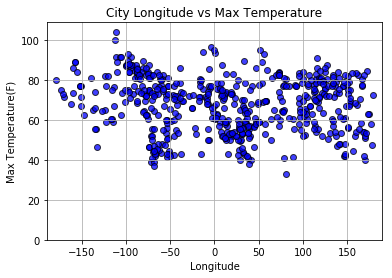

In [21]:
# Find max and min values for longitude and temp
max_lng = max(data['Lng'])
min_lng = min(data['Lng'])
max_t = max(data['Max Temp'])
min_t = min(data['Max Temp'])

# max x and y value for the chart
x_limit = max_lng + 10
y_limit = max_t + 5

#  values for x axis
x_axis = data['Lng']

# values for y axis
y_axis = data['Max Temp']

# create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# x and y plot limits 
plt.xlim(min_lng-10, x_limit)
plt.ylim(0, y_limit)

# add labels to x and y axes
plt.title("City Longitude vs Max Temperature")
plt.xlabel("Longitude")
plt.ylabel("Max Temperature(F)")

# set grid on the plot
plt.grid()

plt.show()



Latitude vs. Temperature Plot

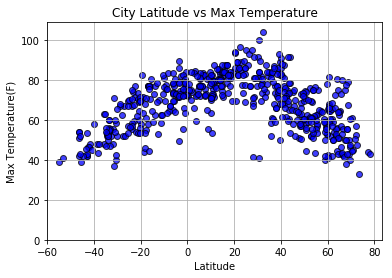

In [22]:
# Find max and min values for latitude and temp
max_lat = max(data['Lat'])
min_lat = min(data['Lat'])
max_t = max(data['Max Temp'])
min_t = min(data['Max Temp'])

# max x and y value for the chart
x_limit = max_lat + 5
y_limit = max_t + 5

#  values for x axis
x_axis = data['Lat']

# values for y axis
y_axis = data['Max Temp']

# create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# x and y plot limits 
plt.xlim(-60, x_limit)
plt.ylim(0, y_limit)

# add labels to x and y axes
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

# set grid on the plot
plt.grid()

plt.show()


#### Latitude vs. Humidity Plot

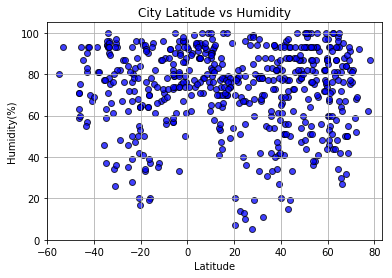

In [24]:
# Find max and min values for latitude and humidity
max_lat = max(data['Lat'])
min_lat = min(data['Lat'])
max_h = max(data['Humidity'])
min_h = min(data['Humidity'])

# max x and y value for the chart
x_limit = max_lat + 5
y_limit = max_h + 5

#  values for x axis
x_axis = data['Lat']

# values for y axis
y_axis = data['Humidity']

# create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# x and y plot limits 
plt.xlim(-60, x_limit)
plt.ylim(0, y_limit)

# add labels to x and y axes
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# set grid on the plot
plt.grid()

plt.show()


#### Latitude vs. Cloudiness Plot

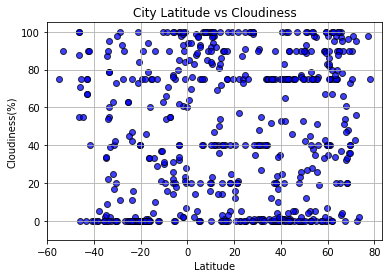

In [28]:
# Find max and min values for latitude and cloudiness
max_lat = max(data['Lat'])
min_lat = min(data['Lat'])
max_c = max(data['Cloudiness'])
min_c = min(data['Cloudiness'])

# max x and y value for the chart
x_limit = max_lat + 5
y_limit = max_c + 5

#  values for x axis
x_axis = data['Lat']

# values for y axis
y_axis = data['Cloudiness']

# create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# x and y plot limits 
plt.xlim(-60, x_limit)
plt.ylim(-10, y_limit)

# add labels to x and y axes
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# set grid on the plot
plt.grid()

plt.show()


#### Latitude vs. Wind Speed Plot

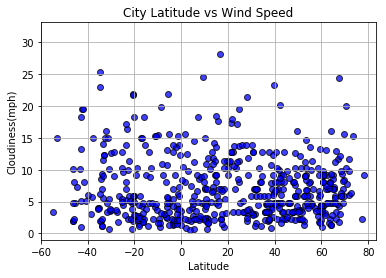

In [32]:
# Find max and min values for latitude and wind speed
max_lat = max(data['Lat'])
min_lat = min(data['Lat'])
max_w = max(data['Wind Speed'])
min_w = min(data['Wind Speed'])

# max x and y value for the chart
x_limit = max_lat + 5
y_limit = max_w + 5

#  values for x axis
x_axis = data['Lat']

# values for y axis
y_axis = data['Wind Speed']

# create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# x and y plot limits 
plt.xlim(-60, x_limit)
plt.ylim(-1, y_limit)

# add labels to x and y axes
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(mph)")

# set grid on the plot
plt.grid()

plt.show()
